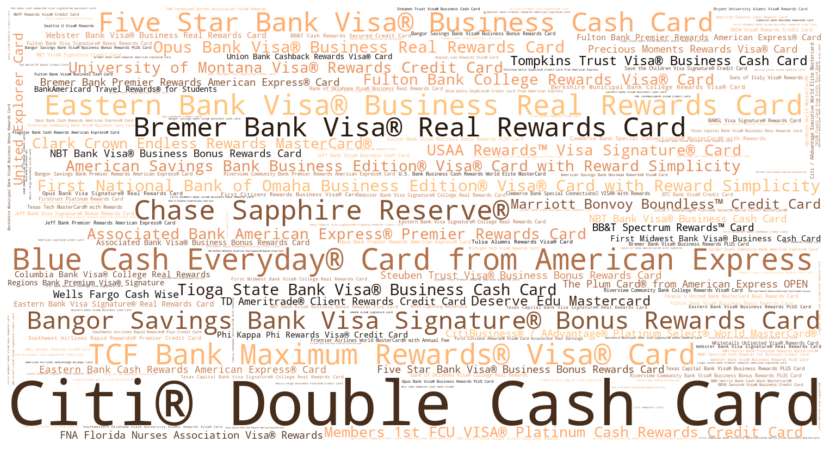

In [1]:
import pickle, os
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud
sns.set()
sns.set_style('whitegrid')
sns.set_context('talk')

f = open('cloud.pkl', 'rb')
word_cloud = pickle.load(f)
# From inspection, of tends.ipynb it looks like the plateau levels 
# out around 2 cards. We're going to see which card was part 
# of the best rewards with a wordcloud
number_of_cards = 2
results = word_cloud[number_of_cards]
scores = []
for (score, cards) in results:
    # Cards are going to be `scored`
    # Essentially, every dollar that was part of their a reward 
    # they were a part of, counts towards their score and is summated
    # across all samples
    score = int(round(score, 0))
    for card in cards:
        scores += [card] * score

word_could_dict = Counter(scores) # Counting the number of points

# Making a plot
wordcloud = WordCloud(width = 1500, 
                      height = 800, 
                      background_color='white',
                      min_font_size=1,
                      max_font_size=150,
                      colormap='copper',
                     ).generate_from_frequencies(word_could_dict)
fig = plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
fig.savefig('cloud.pdf', bbox_inches='tight',dpi=250)

# This will show us which cards scored the best based on size for 
# my own expenses 